#**Chronos** Pronostico de tiempos


>**1.**Importar bibliotecas: Se importan las bibliotecas necesarias para el análisis de datos, la visualización y el uso del modelo Chronos.

> **2.**Instalar bibliotecas: Se instalan las bibliotecas torch, chronos-forecasting y chronos utilizando pip.

>**3.**Cargar datos: Se cargan los datos del archivo CSV "AirPassengers.csv" en un DataFrame de pandas llamado df.

>**4.**Preprocesamiento de datos: Se convierte la columna "Month" a tipo datetime y se establece como índice del DataFrame.

>**5.**Visualización de datos: Se crea un gráfico de la serie temporal para visualizar los datos.

>**6.**División de datos: Se dividen los datos en conjuntos de entrenamiento y prueba.

>**7.**Creación del modelo: Se crea una instancia de ChronosPipeline con un modelo preentrenado.

>**8.**Predicción: Se utiliza el modelo para realizar la predicción de los próximos 12 meses.

>**9.**Procesamiento de la predicción: Se calcula el promedio de las muestras para obtener los valores de pronóstico.

>**10.**Visualización de la predicción: Se agregan los valores de pronóstico al conjunto de prueba y se crea un gráfico que compara los valores reales con los valores de pronóstico.




In [16]:
# Instala las bibliotecas necesarias usando pip
!pip install torch
!pip install git+https://github.com/amazon-science/chronos-forecasting.git
!pip install chronos

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-k1huomty
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-k1huomty
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit ac6ee36acee1e47446cd66f72f540c87f1f1fbe4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [17]:
# Importa las bibliotecas necesarias para el análisis de series temporales
import pandas as pd
import matplotlib.pyplot as plt
import torch
from chronos import ChronosPipeline
import warnings
warnings.filterwarnings('ignore')



In [18]:
# Carga los datos desde un archivo CSV en un DataFrame de pandas
df=pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")
df.info() # Muestra información sobre el DataFrame, como el tipo de datos de cada columna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [19]:
# Muestra el Dataframe
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


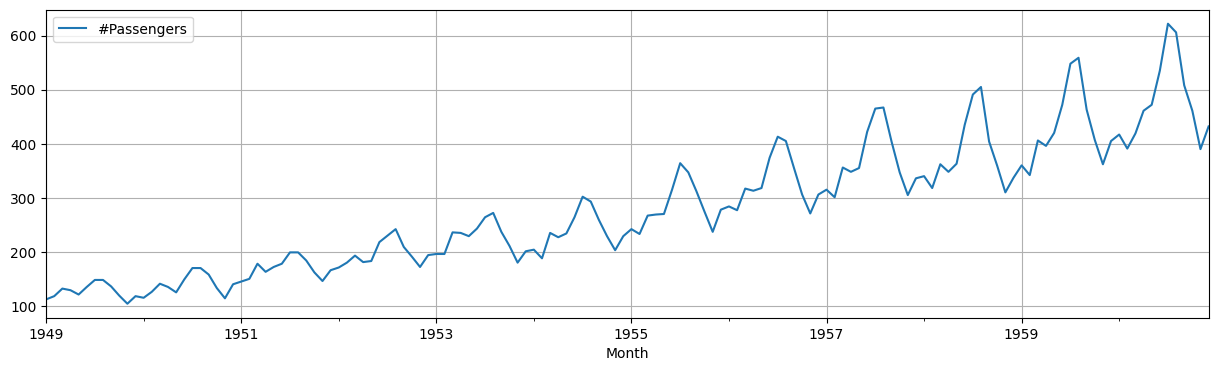

In [20]:
# Convierte la columna "Month" a tipo datetime y la establece como índice
df["Month"]=pd.to_datetime(df["Month"])
df = df.set_index("Month").sort_index()
df.plot(figsize=(15,4), grid=True); # Crea un gráfico de la serie temporal


In [21]:
# Divide los datos en conjuntos de entrenamiento y prueba
df_train = df.loc[df.index <"1960-01-01"].copy()
df_test = df.loc[df.index >= "1960-01-01"].copy()
print("Datos de entrenamiento:", len(df_train),"Datos de evluacion:", len(df_test))


Datos de entrenamiento: 132 Datos de evluacion: 12


In [22]:
# Crea una instancia de ChronosPipeline con un modelo preentrenado
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",
    torch_dtype=torch.bfloat16,
)
# Realiza la predicción utilizando el modelo Chronos
forecast = pipeline.predict(
    context=torch.tensor(df_train["#Passengers"]),
    prediction_length=12,
    num_samples=20,
)

In [24]:
# Muestra la forma del tensor de pronóstico
forecast.shape


torch.Size([1, 20, 12])

In [25]:
# Muestra el tensor de pronóstico
forecast

tensor([[[421.4505, 402.2061, 477.2590, 467.6368, 484.9567, 534.9919, 635.0624,
          665.8532, 600.4225, 533.0674, 490.7300, 536.9163],
         [419.5260, 406.0550, 444.5436, 434.9215, 475.3346, 560.0095, 638.9112,
          663.9288, 558.0851, 463.7879, 402.2061, 446.4681],
         [432.9970, 411.8283, 475.3346, 456.0902, 473.4101, 567.7073, 629.2891,
          636.9868, 534.9919, 459.9391, 413.7527, 446.4681],
         [425.2993, 415.6772, 483.0323, 481.1078, 515.7476, 581.1783, 642.7601,
          654.3066, 600.4225, 544.6140, 506.1255, 554.2362],
         [411.8283, 396.4329, 444.5436, 436.8459, 456.0902, 519.5964, 604.2714,
          615.8180, 533.0674, 488.8056, 434.9215, 479.1834],
         [404.1306, 382.9619, 434.9215, 421.4505, 452.2414, 531.1431, 627.3646,
          623.5158, 536.9163, 479.1834, 396.4329, 444.5436],
         [413.7527, 394.5084, 438.7703, 417.6016, 438.7703, 519.5964, 600.4225,
          596.5737, 513.8232, 450.3169, 396.4329, 452.2414],
         [417

In [27]:
# Calcula los valores de pronóstico promediando las muestras
forecast_values = [float((forecast[0, :, x].mean())) for x in range(forecast.shape[2])]
forecast_values

[415.77337646484375,
 399.1270446777344,
 455.80157470703125,
 441.75323486328125,
 461.67108154296875,
 530.7581787109375,
 611.96923828125,
 624.9591064453125,
 536.0503540039062,
 468.79144287109375,
 420.8731384277344,
 466.8670959472656]

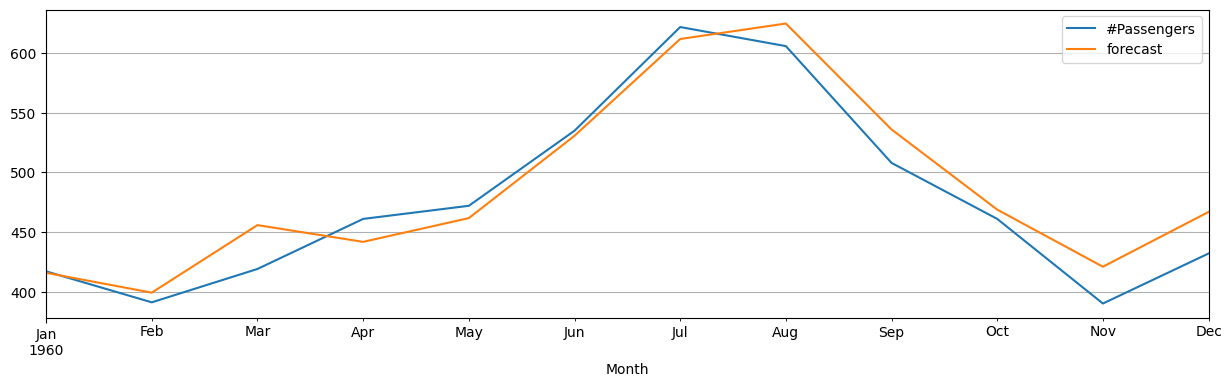

In [30]:
# Agrega los valores de pronóstico al conjunto de prueba
df_test["forecast"] = forecast_values
df_test.plot(figsize=(15,4), grid=True);# Crea un gráfico de la serie temporal con los valores de pronóstico

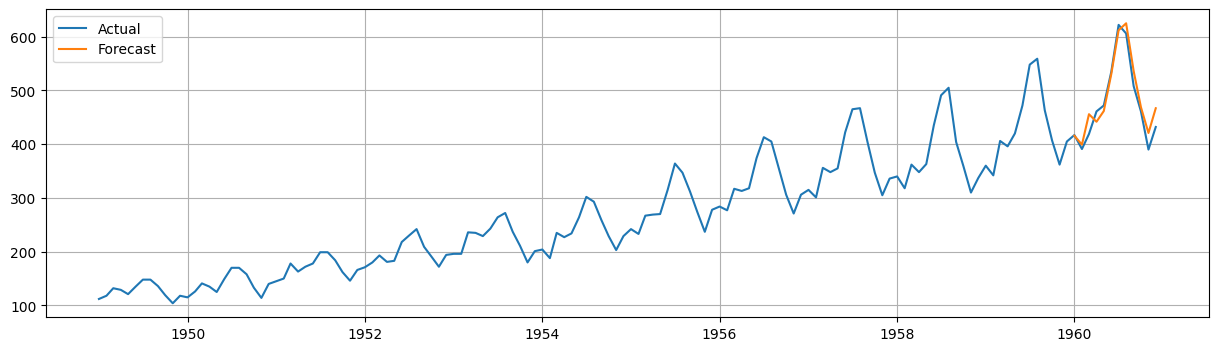

In [33]:
# Crea un gráfico que compara los valores reales con los valores de pronóstico
plt.figure(figsize=(15,4))
plt.plot(df["#Passengers"], label='Actual')
plt.plot(df_test["forecast"], label='Forecast')
plt.legend();
plt.grid();
plt.show()

**El gráfico muestra dos líneas:**

>**Línea azul (Actual):** Representa los valores reales de pasajeros aéreos a lo largo del tiempo, tomados del conjunto de datos original df["#Passengers"]. Esta línea cubre todo el período de tiempo del conjunto de datos.

>**Línea naranja (Forecast):** Representa los valores pronosticados por el modelo Chronos para los últimos 12 meses del conjunto de datos. Estos valores se calcularon utilizando el modelo y se almacenaron en la columna df_test["forecast"].

En resumen, el gráfico compara los valores reales de pasajeros aéreos con los valores pronosticados por el modelo Chronos para los últimos 12 meses.

>**Interpretación:**

>Puedes observar cómo la línea naranja (pronóstico) intenta seguir la tendencia general de la línea azul (valores reales).
La precisión del pronóstico se puede evaluar visualmente observando qué tan cerca está la línea naranja de la línea azul en los últimos 12 meses.

>Idealmente, la línea naranja debería superponerse o estar muy cerca de la línea azul, lo que indicaría un buen rendimiento del modelo.
Elementos adicionales del gráfico:

>**Eje X:** Representa el tiempo (meses).
**Eje Y:** Representa el número de pasajeros aéreos.

>**Leyenda:** Indica qué línea corresponde a los valores reales y cuál a los pronosticados.

>**Cuadrícula:** Facilita la lectura de los valores en el gráfico.